# Import Libraries

In [5]:
# General system libraries
import os
import sys
from IPython.display import Image, Markdown
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Dataframe libraries
import pandas as pd
from pandas import DataFrame, read_csv

# Number manipulation
import scipy.sparse
from scipy.ndimage.filters import generic_filter
import patsy
import numpy as np

# Plotting libaries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


# Data type libaries
from datetime import datetime as dt

# File manipulation
import pickle
import pandas.io.sql as pd_sql
from sqlalchemy import create_engine
import psycopg2 as pg
from flatten_json import flatten

# NLP libraries
import wikipedia as wiki
from nltk import word_tokenize, sent_tokenize,FreqDist, pos_tag
from nltk.corpus import stopwords
import gensim as gn
from gensim import corpora, models, similarities
from collections import defaultdict
from six import iteritems
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS
import string
import emoji
# import enchant
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer


# Scraping libraries
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
# from scraping_functions.tumblr_api import get_client
# import pytumblr

# Stats libaries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm, datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.neighbors import KNeighborsClassifier



# Other libaries
import geopy

/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Define a function to scrape image links

https://www.google.com/search?q=anorexia+tumblr&tbm=isch&tbs=rimg:CWy7VL5zFCUNIjhkPCLK30cjwXRYzgv0FUrGunNW-HnJB3Utg92w3oV2A6uVM4n-0hfVMHd3GhdVEMZ0dRvwZcFMbSoSCWQ8IsrfRyPBEYtOJ2jf6thaKhIJdFjOC_1QVSsYRxxChqAFgdowqEgm6c1b4eckHdRHtwPKleVI7OyoSCS2D3bDehXYDEc8eJ-GalRP2KhIJq5Uzif7SF9URDOQan3U1lr8qEgkwd3caF1UQxhE-jNTB3CEZXCoSCXR1G_1BlwUxtEYY7H1NhkN3c&tbo=u&sa=X&ved=2ahUKEwjewtGix8LbAhXj3YMKHWnzB-0Q9C96BAgBEBs&biw=989&bih=781&dpr=1.6

Q98I0e
rg_ic rg_i

In [14]:
def scrape_image_links(starting_link):
    os.environ['webdriver.chrome.driver'] = 'chromedriver'
    driver = webdriver.Chrome()
    driver.get(starting_link)
    
#     for item in range(limit):
    list_of_srcs = []
    list_of_elements = driver.find_elements_by_class_name('Q98I0e') # returns a list of all web elements with that class name
    for element in list_of_elements:
        src = element.get_attribute("src")
        list_of_srcs.append(src)
    return list_of_srcs

In [16]:
def scrape_image_links(starting_link):
    os.environ['webdriver.chrome.driver'] = 'chromedriver'
    driver = webdriver.Chrome()
    driver.get(starting_link)
    
#     for item in range(limit):
    list_of_srcs = []
    list_of_elements = driver.find_elements_by_css_selector('.rg_ic.rg_i') # returns a list of all web elements with that class name
    for element in list_of_elements:
        src = element.get_attribute("src")
        list_of_srcs.append(src)
    return list_of_srcs

In [18]:
list_of_srcs = scrape_image_links('https://www.google.com/search?q=anorexia+tumblr&tbm=isch&tbs=rimg:CWy7VL5zFCUNIjhkPCLK30cjwXRYzgv0FUrGunNW-HnJB3Utg92w3oV2A6uVM4n-0hfVMHd3GhdVEMZ0dRvwZcFMbSoSCWQ8IsrfRyPBEYtOJ2jf6thaKhIJdFjOC_1QVSsYRxxChqAFgdowqEgm6c1b4eckHdRHtwPKleVI7OyoSCS2D3bDehXYDEc8eJ-GalRP2KhIJq5Uzif7SF9URDOQan3U1lr8qEgkwd3caF1UQxhE-jNTB3CEZXCoSCXR1G_1BlwUxtEYY7H1NhkN3c&tbo=u&sa=X&ved=2ahUKEwjewtGix8LbAhXj3YMKHWnzB-0Q9C96BAgBEBs&biw=989&bih=781&dpr=1.6')

In [19]:
len(list_of_srcs)

100

''
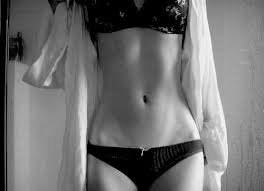

In [20]:
list_of_srcs[2]

# Define a function to download the image from the src link

In [21]:
import urllib.request

urllib.request.urlretrieve("http://www.digimouth.com/news/media/2011/09/google-logo.jpg", "local-filename.jpg")

('local-filename.jpg', <http.client.HTTPMessage at 0x7ff56fdada20>)

In [23]:
import requests

img_data = requests.get('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExIVFRUXGBgYGBcYFRUVFxcVFRcXFhUVFxUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAL8BCAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAgMEBgcAAQj/xABDEAABAgMEBgcFBQYGAwAAAAABAAIDESEEBRIxBiJBUWFxMoGRobHB8BMjYnLRQlKys+EHM4KSwvEkNGNzotIUU6P/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8Axe0D3zh/qH8SsV1Q9T+J3igEQf4g/wC6fxq0XYNQHn4oJLGJ1rV60FOAFAkNSgxLAKdhMQUq2WH2UVwGWY2UOyfBFbHcQw4nlxJrhmZAbJ7zkp172H2jocvvAO+U5ophQVK9rOWwfZNoPaTzyGH6qPa7smyEBR2EA/xEn69qsltsTS4z2tl2z+iREs1RwDe5BSn2VwxcM+Wc/BN2eJhM6zBBHGRyKN3lCHtnDeHDvn4EKvoPSV7SXHukkrkHLl60VUy8LAYZzmCThoQS0EydIhAzYbRge13GvI5qx26OAzECCJUrnuVVTsSMSANjckDbnTqV4uXIFMYSQAJk5BS4dgiB8g2bmjEWyxDC0TrKhHimLJHLHBwAMp0NQZiRBR+6r2EETDGhznTdKUy1w6AaQZCWQyQW3Ri/5shNjOdhgNcQ1smucXFxxNdQAtDgABlKcqVJ2OOIludEb9pjyazM3PBEju2KtX57JsUvY9pDvs63tBShe0khplISEsss0X0Hm62EnLAwD+J2Ltog2ppxEO2OZXmM0O0mhE2R3DCeyIB5qXdkSjm7qjkTVLvqFOyxhuaT2Sd5IMyLF2BP4V2FAwWLixSCxeOYgiRIfamnMNVMeEh7UA97VykRGLkGVWOBjtgYTKcU15OJ8lZbnZ7mH8oPbVV27D/jJ/G89zirRYW4WNbuEuxBKaEsBIDgnAUCgE81tE01PxKBBEhmZ61MYolkZmVPYKIB9oZNzp7h4ldEZU+tidisnEG4y7k4WoKffrgyIHHKcj1gf9Qq6ZYuE+6atukNkLsUhWc/+H6qoOEjLcgdiw6ktGqNuzlPbmm8J3LyaW15mMzLnkOWySBtKc8nMkyoOA3JcKA551Wk8h6kidl0djPzwtHEzPYEAdcrQzRPfEnybLxKZjaNSycesIK6n4kUFoEsjnICn1mio0ecKhwPAj1JR411ljgS2IWzrIA04EHyQC05AilrmuGYIPWDNG7FdNni9GPgcC5uB8sTpChBApM7JHLNDBZh7MkkB+KRa4yMgJ4gOwbZ1QE9H5xbREeWtIwxHFr9YTcDLrxS3K6fssjOi2hz3SJMQzIAAk1glIDISCzq7WzJaXBrczMgA4QSBWlTIV3rSv2UQcBhOlLGXHtxAdwCDXLF0+rzCLRYWNkRn3gR/M2SFWIa6MQDrO6kGY4V4Qp96QcMaI3c93ZOY7iomFAktSXNT7gklqCK9qSGevXUn3NSS3aghxxT162LkuM3zXIMdud844O2UQ/8HlWGJeTGOLSZSJE5HYf1VcuX97ybEP8A83KfeLBjiTBIDnZS+8gfu68WmMa9JxIOVJSA5qyscqRCwCKwigc0fzEEeKuFjfNoQT4QqOSXajReQBUKVZ7PjdPYPFBHZBwgDtUtrFzhMpwOogjey1p80h7VKBEyNoAn1plwqgGW2DMnmPCSo9+2fBHcNhkeo/2Wi2mGgekd2B4bElVhrxafoa9qALd9mY5om0HmApzLBD+43sCYuqjBLiOwkInDQLhhTYChyqpll3IJsKHNMWyDJFbDAmmr7hSkgBezUizQqpLQpljZVASsdxWaLJz4TSRIg1BEspEVRm2aKWOMAYsNzyB9qLFdkJbXJV2wKBG8GrJBkelGjVlgw4zobC3CNXXca03lWXQZmBllJpINn1/3Q/T6H7t7PvOhjteEdsMDCGAbJd39kGh2TphFobak75IJZXzwHfJHhl2IKbpVBlaCfvNafLyQjCrJpjD1obt7SOw/qq7JBxCTJOFeSQMOCbKfcmntp6zQR4mz1v8AouSjJeoMTuT947/bifgcvLzrGij/AFHy54jIp7Rts4pHwP72y81YYOjhfExEjWeXZHJxmBNBWIcAtisaRsaeo181dbEyiTarlf7YRCKDr+7LuCnWaDIIHoSPQ4WCA2kiZ9/oJvR65jE948SYK/MR5KffDqgbvNAGayQxLyC0GbnZNqnCS6TB2c9iYviKAPZMyHSO87epAzYHFwc4/acSnMOSXZIUoY41XoGXNA1HamojAQQdoUq2NUC1PkEFUu+Fhxs+7EeO9EGqLChye/i4nrKlsagXmp1iFVGY1S7KJFBZLAJBQb+fMhOwI8goF4PmUA8lTbC6oUMtT1nMigv90VaEVDZTQHR6LRGbwi4WzQUm+4QixS0iYxDuqisCRAlsl9ECttpk/EKzdLuKIXJELjXKYHXOfkg0GzMpDHJHSg1nd0DuIRh+XWgCaWw5sY7c4jtH6KrYVc9IWYoDvhcD3y81TiEHSXhCWQvEDbzwCjk5qU+GVDLZFAy9vPrXJbwuQY1ouPen5D3uaPNaRYBrN5hZxosPeu+UfmQ1plgbrN5oCwhhQrTBaXBsq7eSIWqIGtLtw79iAQo5mScygu11xPdy2Aegq9eUaZdz8FNstvlCNaykhMIF5kMyf1mgfsMMNa6K4yw5c/0HiEGi1JO8ojpAwtaxmwTpvyqUPNQgIjoN5BN4ahPsbqAHcF5AbN4HLzQeXjDoChVsbNvWFZrzs/u57lX4rUFffBqTxM+1ew1NjMo7r+qiMCB5qehGSjhPMQEIb03HXQilRAghlLhmq4hdCFUFv0dcp+kMfVkENuMyCfvl02oKtaTVnPyKN3YJFg4zQCMfewxvJ7pFWGx/vGoL9BOqEZinLmq/dr5wxwR2I6oHAd6Bu1sxQ4rd7XdypBV7hGvMlUiM2TiNxI7KIEFeOCVJeEIGXqNFBn6yy81Jeo8TMIGnbF6vHhcgxnRt0ojjwaO2Ixaldw1281luj3Sdzh/msHmtWusa45oDDoIIIIBBzBQq23PKsMy4HyKNyTdoFEFbJc0EOBHh2otcFsgQyTFMiRIUJkNtAM168JiJDBzA7EEW/wC1tivm3oig+qGwyZSRn2Ddw7EowGylIVQNtNByTljb7zsSHCQluT13DXB4juQHbys/uTyPcFTntoFoVsh+5f8AK7wKoMZAKjChPNQWKbGOqeZUYNQIanWFNyXBAQsykvZRR7Ci74IwEoAUQ1UiyQ5lR3VMxIjeDNGrpg1QE7EyQTtqE2qW2BIJBhUKCoyHtWk7Ce8IxZDrhB7zhkOPAzRO6omIAoLvcvRdzR32mseACD3I0YDzRKM6TonPyQSILqA8VVr1ZKNEHxE9pn5q0NGqEE0lgyiB33mg9Yp9EAkpLglJJQMxEw8V9cE+9RnhA08rlzj+q5Bj2jWbvmg/nMWp3WdcD1tWXaLir/mg98Zi1K6xrhAeakWgUT8MJu0ZIIDwmXBS3tTDmoGgEqS9klAIIcXbzUu6W645qNG6R9bEQuJvvGjigtNtZKDEPwn8Kzi0Gh6/ArS7z/y0U/A78JWX214DCgExTUjrSXBPQxmU3EQNLl5NdNBOsRkrC2F7SE9u0tIHMhVizuqjditMkFV0ahvYMD2lsiRLdVX254QohL4QLpy2qwXY0UQGRDokug0UiGaBSIsPVQUu/LuJ1gELuJxDnMOw9xy8Cr46AHUVZvy6zZ4jYwGo44XcJ5Ht8UFs0eiZhErbE13j5fAINo0dY8p9qlXtHwxXA7cJ6pBAbB1VC0hhzhQ37jLqP6hSYL5tCVaoeKzvEshMfw18kFRKS5LcU09A1EKjvNZJ55TD8x63IGYneuXRRM0zNOtcgyXRQVf80D85v6LT7rGuPWxZfonm/wCaD+a1ajdXTCCxtCRHyS2JuOKIIsRNuCccmpoEyXL2S8KCHH6R6vJE7ldKI0+tqFu6R5oldnTHMILhfA/w8b/bd+ErILyiTk0eqLYr1/y0Q/6b/wAJWMBuKIeCBREgmS1SHt2JfsUA17ZJCIRYFFDMNB7DKJWVygQ2KfZ2yQS4bqo/dhQKEEdu8IDsHMIlGGqhtkqVPjPkEECDEqjFou5logOhu+0JT3HYUCiUrNGrltexAG0ahuaSH0c2bHfM0+Bz5FRdKYobGaZ9Jo/4mX0VovSAGv8Aaj7Up820n/K4/wAqq15tY+0BrhUNkDMipJMqIDV02qcPijlhOIOad3caFVuxGUmjlJHruia5nSiCoxQQ4jcSOyibcVOvtko0QfET/NJ3mhzygaeVHfWaec6dfUlHMjPqQNxCuXjyvEGU6JCr/mg/mhaldXTCy7RHN/zQfzQtRuvpBBYYeSTHFEtgSI+SCG9NhOvCaKDwpBXFIimh5FBEYdbmSURu863YhkLPqU+wGvYguekjg2wxfkI7aeayK6xMly1XTLVu+Jwa3uLVk+jtpa+EHA55jcdxQErPZ8RKdfCkkXdHk8gqdaJEoBroSgxYUiiMRpaeCaiCaCJCapkNqj4JFTYLUEiC1FrJRDYIROytyQHLAdqXbIybhmQQ+02mZkEChHJNVJhW3BIoRar1gQxrxWNPFwn2IBaNMbLsL3yrqtPiZINctLTEsriKnCXDmBP9OtVGWN2I5n0EPur9orsAYyCJfE7yklWG24pEU4Zy4ILRYnNwuJFRKR8UUiZiIJbKcRQqu3fHlOYmEbuuJjbLcZ9RzQCtJh7+e9jT5eSCxCjulf71p+Dwc5V97pzqganTNRw+cwnsVFChv1j1oFjb31XJsTBInOXryXiDMdEs3/NB/NatRuzphZXosen80D85i1O7emOf1QWJhSY2S9aV5GNEEV6acnXFNOQNFNWk6pThTVo6JQQ4ZqiN19KuQQ0ZlTbudnzQWf8AaE/FdVoI/wDUT2BfM8C0vZVj3N5EhfS2mdboi8YcjyMgVidu0WY6GHwjhdLI9E/QoAcDSC0syiE8w095CnQ9M7UNrDzZ9JIHarK+GcL2lp47eR2psAILONObQaOZCPU4f1JbdNHbYI6nkeIKq72DY6fURv8Ap3rzB1+tyC2M0yH2oRnweP8AqjejulUGM/2TmuY4gkOJaWANBc8vmRIBoLp7gVmxCl3ZbvYmIcAcXwnwxM9H2jcJdxOEuHWg0O8NL4MJs2lsVxybDdMcC5xFBlSU+CHD9o8bNkCGJCdXF2R4S4BUJTWu1DtOA9U3AlBabRpzb309oxky0arBSeypO9BrRfFpiAF0V5Lg7IkCYO4U3ZcFEixJzl8LgN/ohR4kaRIFdbE3rzHegdd0pkzxDnIjZ2hSrDExS5V4IaGTNZzn0RU12c1etGdFYjwC5oht+ITceOHZ1oHblgOpL6DvVluVrmRokN33WPGeTsQOfJXbRW4IEORwYnfedU9Q2Ibp28Q7wspwn3sJ8MuEpDAS5s+syQdAfIo/ckXW9baKuBErsjEOCCZpaP3fJ472/VVeK7LsVl0xf+6/jPbhVXeeKBgmh5lR2ymTwJTk+lzKYxZcvogUc58OK8SC+fH9FyDMdFzV/wA0D89i1W7+kOayjRjN3zQfz4a1awHWCA+xdGySYbl5EdRBHekPySnpDygaco9qdQDin3FRY5ry80EYmpU262zMuKgE5qdcz5V4oLNpiZXVEHwgd4WdubJgV300i4breDniaO1wKokaLqjkgdh3ayK3C9ocOI7wdird8aDvE3QK/Ac/4Tt61cLmdNWL2E0Hz9HgOY4te0tcMwRIjqTa3S9tH4FpbhismdjhR7fld5GizDSnQ+NZDjHvIJNHgVHB42c8vBBWly5cg9U6zNnhnlrNnsrWigtMqpxsbVLZDnuQKdFJDRkWgjqnv7VIu27YkY4YbabXHIeu1P3VdJiazphvef0V5uyE1jQ1oAHBA7o9o7CgSMsT9riK9W5XS7IUyEDsTplWq6ISC03VDkFXtPrudFi2ZwIGDHXcZsI8CrRYW0QzSbNnI+SADjAOSmQSwjEKES2J6BZWPIBnXaFLtF1MhMc6JEk0dp3DmgD6VWkOewDJrB2kmfgFX4jku0x8TiePYJBR3uQNOfIHgT1+ppqdRWa8e7x55f2TZdXfIIEtNTPeuTRNTX1JcgzrRo1dzg/nw1qlidrDmso0dOs7nC/OhrU7GdYILBDcvHuTUNyU80QNOKSSvHlILkCSokV1SVJJUKNt5oGHmifu99RzTLjRJs769aA3+0a1j/wcO8tPZQd8lQzaKBHNPY+KAW/da09jmnyVPZGQWm4rRVXqySIWYXRFkVolyx5gIJNogptzA5pa4AgiRBqCCiEVlFDe2SDItOdEv/GcYsIThHMfcJ/p8FTlvV8BrmOa4TBBBHBYfednEOK9gyBpy2IIqKXbYQdZ3UFCscLE6SPQ/BARs7pItZXoGx6JWJ00Fou2pV0uhuSp9zNyV2upuSCyWegQLSWLrtHDxP6I1CdRU/S21H20hsaPMoCdgfqg7sk7ps/3EM7C7+kyQq6rTNg5p7Si0E2aG34+7C6SCqOdU9Sae7ekudU9XgFHtMUhpKD1zsuZTWKpHLaux06yovtKzO36IHHP+tOv6LlHfE8u+YXIP//Z').content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

InvalidSchema: No connection adapters were found for 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExIVFRUXGBgYGBcYFRUVFxcVFRcXFhUVFxUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAL8BCAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAgMEBgcAAQj/xABDEAABAgMEBgcFBQYGAwAAAAABAAIDESEEBRIxBiJBUWFxMoGRobHB8BMjYnLRQlKys+EHM4KSwvEkNGNzotIUU6P/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8Axe0D3zh/qH8SsV1Q9T+J3igEQf4g/wC6fxq0XYNQHn4oJLGJ1rV60FOAFAkNSgxLAKdhMQUq2WH2UVwGWY2UOyfBFbHcQw4nlxJrhmZAbJ7zkp172H2jocvvAO+U5ophQVK9rOWwfZNoPaTzyGH6qPa7smyEBR2EA/xEn69qsltsTS4z2tl2z+iREs1RwDe5BSn2VwxcM+Wc/BN2eJhM6zBBHGRyKN3lCHtnDeHDvn4EKvoPSV7SXHukkrkHLl60VUy8LAYZzmCThoQS0EydIhAzYbRge13GvI5qx26OAzECCJUrnuVVTsSMSANjckDbnTqV4uXIFMYSQAJk5BS4dgiB8g2bmjEWyxDC0TrKhHimLJHLHBwAMp0NQZiRBR+6r2EETDGhznTdKUy1w6AaQZCWQyQW3Ri/5shNjOdhgNcQ1smucXFxxNdQAtDgABlKcqVJ2OOIludEb9pjyazM3PBEju2KtX57JsUvY9pDvs63tBShe0khplISEsss0X0Hm62EnLAwD+J2Ltog2ppxEO2OZXmM0O0mhE2R3DCeyIB5qXdkSjm7qjkTVLvqFOyxhuaT2Sd5IMyLF2BP4V2FAwWLixSCxeOYgiRIfamnMNVMeEh7UA97VykRGLkGVWOBjtgYTKcU15OJ8lZbnZ7mH8oPbVV27D/jJ/G89zirRYW4WNbuEuxBKaEsBIDgnAUCgE81tE01PxKBBEhmZ61MYolkZmVPYKIB9oZNzp7h4ldEZU+tidisnEG4y7k4WoKffrgyIHHKcj1gf9Qq6ZYuE+6atukNkLsUhWc/+H6qoOEjLcgdiw6ktGqNuzlPbmm8J3LyaW15mMzLnkOWySBtKc8nMkyoOA3JcKA551Wk8h6kidl0djPzwtHEzPYEAdcrQzRPfEnybLxKZjaNSycesIK6n4kUFoEsjnICn1mio0ecKhwPAj1JR411ljgS2IWzrIA04EHyQC05AilrmuGYIPWDNG7FdNni9GPgcC5uB8sTpChBApM7JHLNDBZh7MkkB+KRa4yMgJ4gOwbZ1QE9H5xbREeWtIwxHFr9YTcDLrxS3K6fssjOi2hz3SJMQzIAAk1glIDISCzq7WzJaXBrczMgA4QSBWlTIV3rSv2UQcBhOlLGXHtxAdwCDXLF0+rzCLRYWNkRn3gR/M2SFWIa6MQDrO6kGY4V4Qp96QcMaI3c93ZOY7iomFAktSXNT7gklqCK9qSGevXUn3NSS3aghxxT162LkuM3zXIMdud844O2UQ/8HlWGJeTGOLSZSJE5HYf1VcuX97ybEP8A83KfeLBjiTBIDnZS+8gfu68WmMa9JxIOVJSA5qyscqRCwCKwigc0fzEEeKuFjfNoQT4QqOSXajReQBUKVZ7PjdPYPFBHZBwgDtUtrFzhMpwOogjey1p80h7VKBEyNoAn1plwqgGW2DMnmPCSo9+2fBHcNhkeo/2Wi2mGgekd2B4bElVhrxafoa9qALd9mY5om0HmApzLBD+43sCYuqjBLiOwkInDQLhhTYChyqpll3IJsKHNMWyDJFbDAmmr7hSkgBezUizQqpLQpljZVASsdxWaLJz4TSRIg1BEspEVRm2aKWOMAYsNzyB9qLFdkJbXJV2wKBG8GrJBkelGjVlgw4zobC3CNXXca03lWXQZmBllJpINn1/3Q/T6H7t7PvOhjteEdsMDCGAbJd39kGh2TphFobak75IJZXzwHfJHhl2IKbpVBlaCfvNafLyQjCrJpjD1obt7SOw/qq7JBxCTJOFeSQMOCbKfcmntp6zQR4mz1v8AouSjJeoMTuT947/bifgcvLzrGij/AFHy54jIp7Rts4pHwP72y81YYOjhfExEjWeXZHJxmBNBWIcAtisaRsaeo181dbEyiTarlf7YRCKDr+7LuCnWaDIIHoSPQ4WCA2kiZ9/oJvR65jE948SYK/MR5KffDqgbvNAGayQxLyC0GbnZNqnCS6TB2c9iYviKAPZMyHSO87epAzYHFwc4/acSnMOSXZIUoY41XoGXNA1HamojAQQdoUq2NUC1PkEFUu+Fhxs+7EeO9EGqLChye/i4nrKlsagXmp1iFVGY1S7KJFBZLAJBQb+fMhOwI8goF4PmUA8lTbC6oUMtT1nMigv90VaEVDZTQHR6LRGbwi4WzQUm+4QixS0iYxDuqisCRAlsl9ECttpk/EKzdLuKIXJELjXKYHXOfkg0GzMpDHJHSg1nd0DuIRh+XWgCaWw5sY7c4jtH6KrYVc9IWYoDvhcD3y81TiEHSXhCWQvEDbzwCjk5qU+GVDLZFAy9vPrXJbwuQY1ouPen5D3uaPNaRYBrN5hZxosPeu+UfmQ1plgbrN5oCwhhQrTBaXBsq7eSIWqIGtLtw79iAQo5mScygu11xPdy2Aegq9eUaZdz8FNstvlCNaykhMIF5kMyf1mgfsMMNa6K4yw5c/0HiEGi1JO8ojpAwtaxmwTpvyqUPNQgIjoN5BN4ahPsbqAHcF5AbN4HLzQeXjDoChVsbNvWFZrzs/u57lX4rUFffBqTxM+1ew1NjMo7r+qiMCB5qehGSjhPMQEIb03HXQilRAghlLhmq4hdCFUFv0dcp+kMfVkENuMyCfvl02oKtaTVnPyKN3YJFg4zQCMfewxvJ7pFWGx/vGoL9BOqEZinLmq/dr5wxwR2I6oHAd6Bu1sxQ4rd7XdypBV7hGvMlUiM2TiNxI7KIEFeOCVJeEIGXqNFBn6yy81Jeo8TMIGnbF6vHhcgxnRt0ojjwaO2Ixaldw1281luj3Sdzh/msHmtWusa45oDDoIIIIBBzBQq23PKsMy4HyKNyTdoFEFbJc0EOBHh2otcFsgQyTFMiRIUJkNtAM168JiJDBzA7EEW/wC1tivm3oig+qGwyZSRn2Ddw7EowGylIVQNtNByTljb7zsSHCQluT13DXB4juQHbys/uTyPcFTntoFoVsh+5f8AK7wKoMZAKjChPNQWKbGOqeZUYNQIanWFNyXBAQsykvZRR7Ci74IwEoAUQ1UiyQ5lR3VMxIjeDNGrpg1QE7EyQTtqE2qW2BIJBhUKCoyHtWk7Ce8IxZDrhB7zhkOPAzRO6omIAoLvcvRdzR32mseACD3I0YDzRKM6TonPyQSILqA8VVr1ZKNEHxE9pn5q0NGqEE0lgyiB33mg9Yp9EAkpLglJJQMxEw8V9cE+9RnhA08rlzj+q5Bj2jWbvmg/nMWp3WdcD1tWXaLir/mg98Zi1K6xrhAeakWgUT8MJu0ZIIDwmXBS3tTDmoGgEqS9klAIIcXbzUu6W645qNG6R9bEQuJvvGjigtNtZKDEPwn8Kzi0Gh6/ArS7z/y0U/A78JWX214DCgExTUjrSXBPQxmU3EQNLl5NdNBOsRkrC2F7SE9u0tIHMhVizuqjditMkFV0ahvYMD2lsiRLdVX254QohL4QLpy2qwXY0UQGRDokug0UiGaBSIsPVQUu/LuJ1gELuJxDnMOw9xy8Cr46AHUVZvy6zZ4jYwGo44XcJ5Ht8UFs0eiZhErbE13j5fAINo0dY8p9qlXtHwxXA7cJ6pBAbB1VC0hhzhQ37jLqP6hSYL5tCVaoeKzvEshMfw18kFRKS5LcU09A1EKjvNZJ55TD8x63IGYneuXRRM0zNOtcgyXRQVf80D85v6LT7rGuPWxZfonm/wCaD+a1ajdXTCCxtCRHyS2JuOKIIsRNuCccmpoEyXL2S8KCHH6R6vJE7ldKI0+tqFu6R5oldnTHMILhfA/w8b/bd+ErILyiTk0eqLYr1/y0Q/6b/wAJWMBuKIeCBREgmS1SHt2JfsUA17ZJCIRYFFDMNB7DKJWVygQ2KfZ2yQS4bqo/dhQKEEdu8IDsHMIlGGqhtkqVPjPkEECDEqjFou5logOhu+0JT3HYUCiUrNGrltexAG0ahuaSH0c2bHfM0+Bz5FRdKYobGaZ9Jo/4mX0VovSAGv8Aaj7Up820n/K4/wAqq15tY+0BrhUNkDMipJMqIDV02qcPijlhOIOad3caFVuxGUmjlJHruia5nSiCoxQQ4jcSOyibcVOvtko0QfET/NJ3mhzygaeVHfWaec6dfUlHMjPqQNxCuXjyvEGU6JCr/mg/mhaldXTCy7RHN/zQfzQtRuvpBBYYeSTHFEtgSI+SCG9NhOvCaKDwpBXFIimh5FBEYdbmSURu863YhkLPqU+wGvYguekjg2wxfkI7aeayK6xMly1XTLVu+Jwa3uLVk+jtpa+EHA55jcdxQErPZ8RKdfCkkXdHk8gqdaJEoBroSgxYUiiMRpaeCaiCaCJCapkNqj4JFTYLUEiC1FrJRDYIROytyQHLAdqXbIybhmQQ+02mZkEChHJNVJhW3BIoRar1gQxrxWNPFwn2IBaNMbLsL3yrqtPiZINctLTEsriKnCXDmBP9OtVGWN2I5n0EPur9orsAYyCJfE7yklWG24pEU4Zy4ILRYnNwuJFRKR8UUiZiIJbKcRQqu3fHlOYmEbuuJjbLcZ9RzQCtJh7+e9jT5eSCxCjulf71p+Dwc5V97pzqganTNRw+cwnsVFChv1j1oFjb31XJsTBInOXryXiDMdEs3/NB/NatRuzphZXosen80D85i1O7emOf1QWJhSY2S9aV5GNEEV6acnXFNOQNFNWk6pThTVo6JQQ4ZqiN19KuQQ0ZlTbudnzQWf8AaE/FdVoI/wDUT2BfM8C0vZVj3N5EhfS2mdboi8YcjyMgVidu0WY6GHwjhdLI9E/QoAcDSC0syiE8w095CnQ9M7UNrDzZ9JIHarK+GcL2lp47eR2psAILONObQaOZCPU4f1JbdNHbYI6nkeIKq72DY6fURv8Ap3rzB1+tyC2M0yH2oRnweP8AqjejulUGM/2TmuY4gkOJaWANBc8vmRIBoLp7gVmxCl3ZbvYmIcAcXwnwxM9H2jcJdxOEuHWg0O8NL4MJs2lsVxybDdMcC5xFBlSU+CHD9o8bNkCGJCdXF2R4S4BUJTWu1DtOA9U3AlBabRpzb309oxky0arBSeypO9BrRfFpiAF0V5Lg7IkCYO4U3ZcFEixJzl8LgN/ohR4kaRIFdbE3rzHegdd0pkzxDnIjZ2hSrDExS5V4IaGTNZzn0RU12c1etGdFYjwC5oht+ITceOHZ1oHblgOpL6DvVluVrmRokN33WPGeTsQOfJXbRW4IEORwYnfedU9Q2Ibp28Q7wspwn3sJ8MuEpDAS5s+syQdAfIo/ckXW9baKuBErsjEOCCZpaP3fJ472/VVeK7LsVl0xf+6/jPbhVXeeKBgmh5lR2ymTwJTk+lzKYxZcvogUc58OK8SC+fH9FyDMdFzV/wA0D89i1W7+kOayjRjN3zQfz4a1awHWCA+xdGySYbl5EdRBHekPySnpDygaco9qdQDin3FRY5ry80EYmpU262zMuKgE5qdcz5V4oLNpiZXVEHwgd4WdubJgV300i4breDniaO1wKokaLqjkgdh3ayK3C9ocOI7wdird8aDvE3QK/Ac/4Tt61cLmdNWL2E0Hz9HgOY4te0tcMwRIjqTa3S9tH4FpbhismdjhR7fld5GizDSnQ+NZDjHvIJNHgVHB42c8vBBWly5cg9U6zNnhnlrNnsrWigtMqpxsbVLZDnuQKdFJDRkWgjqnv7VIu27YkY4YbabXHIeu1P3VdJiazphvef0V5uyE1jQ1oAHBA7o9o7CgSMsT9riK9W5XS7IUyEDsTplWq6ISC03VDkFXtPrudFi2ZwIGDHXcZsI8CrRYW0QzSbNnI+SADjAOSmQSwjEKES2J6BZWPIBnXaFLtF1MhMc6JEk0dp3DmgD6VWkOewDJrB2kmfgFX4jku0x8TiePYJBR3uQNOfIHgT1+ppqdRWa8e7x55f2TZdXfIIEtNTPeuTRNTX1JcgzrRo1dzg/nw1qlidrDmso0dOs7nC/OhrU7GdYILBDcvHuTUNyU80QNOKSSvHlILkCSokV1SVJJUKNt5oGHmifu99RzTLjRJs769aA3+0a1j/wcO8tPZQd8lQzaKBHNPY+KAW/da09jmnyVPZGQWm4rRVXqySIWYXRFkVolyx5gIJNogptzA5pa4AgiRBqCCiEVlFDe2SDItOdEv/GcYsIThHMfcJ/p8FTlvV8BrmOa4TBBBHBYfednEOK9gyBpy2IIqKXbYQdZ3UFCscLE6SPQ/BARs7pItZXoGx6JWJ00Fou2pV0uhuSp9zNyV2upuSCyWegQLSWLrtHDxP6I1CdRU/S21H20hsaPMoCdgfqg7sk7ps/3EM7C7+kyQq6rTNg5p7Si0E2aG34+7C6SCqOdU9Sae7ekudU9XgFHtMUhpKD1zsuZTWKpHLaux06yovtKzO36IHHP+tOv6LlHfE8u+YXIP//Z'

In [24]:
urllib.urlretrieve(list_of_srcs[2], word+".jpg")
driver.close()

AttributeError: module 'urllib' has no attribute 'urlretrieve'

In [25]:
from google_images_download import google_images_download

In [26]:
response = google_images_download.googleimagesdownload()


In [27]:
arguments = {"keywords": "anorexia tumblr", "limit": 100, "print_urls": True}
paths = response.download(arguments)
print(paths)


Item no.: 1 --> Item name = anorexia tumblr
Evaluating...
Starting Download...
Image URL: https://i.pinimg.com/originals/9c/8d/33/9c8d330fd32cee066ae7ecf9a8d455e2.jpg
Completed Image ====> 1. 9c8d330fd32cee066ae7ecf9a8d455e2.jpg
Image URL: https://data.whicdn.com/images/112505974/large.jpg
Completed Image ====> 2. large.jpg
Image URL: https://i.pinimg.com/originals/e8/b8/ac/e8b8acc89fe0afd4b1203acd3baf76d6.jpg
Completed Image ====> 3. e8b8acc89fe0afd4b1203acd3baf76d6.jpg
Image URL: https://i.pinimg.com/originals/f3/38/84/f33884e8519a34410621381fc38a2335.jpg
Completed Image ====> 4. f33884e8519a34410621381fc38a2335.jpg
Image URL: http://www.theeighty8.com/wp-content/uploads/2014/03/nike.png-1050x700.png
Completed Image ====> 5. nike.png
Image URL: https://static.tumblr.com/689830b4239c28c3adf03805a19a4a4d/eqr4osi/LoAnvr5bw/tumblr_static_tumblr_static_b6sg07lxzw8wos00s8o8wwskg_640.jpg
Completed Image ====> 6. tumblr_static_tumblr_static_b6sg07lxzw8wos00s8o8wwskg_640.jpg
Image URL: https

Completed Image ====> 51. tumblr_mqsz2etktl1s7rsyko1_400.gif
Image URL: https://i.gifer.com/9usi.gif
Completed Image ====> 52. 9usi.gif
Image URL: https://i.pinimg.com/474x/1a/5a/c2/1a5ac205868ef2494e734d143752c13a.jpg
Completed Image ====> 53. 1a5ac205868ef2494e734d143752c13a.jpg
Image URL: https://i.pinimg.com/originals/2a/56/f7/2a56f773697903989bbe6ce95bf438d6.jpg
Completed Image ====> 54. 2a56f773697903989bbe6ce95bf438d6.jpg
Image URL: https://i.pinimg.com/originals/b5/6c/5e/b56c5e119bc3649042a13232a62dcaa9.jpg
Completed Image ====> 55. b56c5e119bc3649042a13232a62dcaa9.jpg
Image URL: https://thesecret-proana.weebly.com/uploads/4/5/4/9/45498647/1824007_orig.jpg
Completed Image ====> 56. 1824007_orig.jpg
Image URL: https://c8.alamy.com/comp/DT626R/selfharm-keywords-that-are-used-in-social-media-such-as-instagram-DT626R.jpg
Completed Image ====> 57. selfharm-keywords-that-are-used-in-social-media-such-as-instagram-dt626r.jpg
Image URL: https://image.slidesharecdn.com/anorexianervosapr